In [2]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
data=pd.read_csv('mnist_train.csv')


In [4]:
idx=np.random.choice(data.index,6000)
data=data.iloc[idx]
data



,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
33803,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14622,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17011,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40495,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40981,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41823,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17789,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.reset_index(inplace=True)
data

,index,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,33803,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14622,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17011,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40495,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46963,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,40981,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,255,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,41823,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,17789,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.drop(columns='index',inplace=True)

In [7]:
labels=data.iloc[:,0]
data=data.iloc[:, 1:]
dataNorm=data/np.max(data,axis=0)



In [8]:
dataNorm.fillna(0,inplace=True)

In [9]:
dataT=torch.tensor(np.array(dataNorm)).float()
labelsT=torch.tensor(np.array(labels)).long()


In [10]:

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)

# Step 3: convert into PyTorch Datasets
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
     

In [11]:

# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.01)

  return net,lossfun,optimizer
     

In [12]:
def function2trainTheModel(net,lossfun,optimizer):

  # number of epochs
  numepochs = 10
  
  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    net.train()
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net
     

In [13]:
tempnet=createTheMNISTNet()[0]
print(tempnet)

mnistNet(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)


In [23]:
p=next(iter(tempnet.named_parameters()))
p[1].data

tensor([[ 0.0139,  0.0035,  0.0101,  ...,  0.0009,  0.0055,  0.0266],
        [ 0.0301,  0.0088,  0.0257,  ...,  0.0287,  0.0267,  0.0277],
        [ 0.0120,  0.0324,  0.0026,  ...,  0.0181,  0.0133,  0.0019],
        ...,
        [ 0.0013, -0.0076, -0.0009,  ..., -0.0346,  0.0050,  0.0299],
        [ 0.0284,  0.0319,  0.0047,  ..., -0.0076, -0.0189, -0.0177],
        [ 0.0111, -0.0225,  0.0250,  ...,  0.0188, -0.0058, -0.0267]])

In [14]:
print('Weights for layer fc1 :')
print(tempnet.fc1.weight.data)

Weights for layer fc1 :
tensor([[-0.0079, -0.0507,  0.0264,  ..., -0.0741,  0.0179, -0.0265],
        [ 0.0014,  0.0532, -0.0982,  ..., -0.1183, -0.0480,  0.1216],
        [ 0.0542,  0.1099,  0.0147,  ..., -0.1244, -0.0354, -0.0514],
        ...,
        [-0.1087, -0.1088, -0.1027,  ..., -0.0446,  0.0179, -0.0536],
        [-0.0180,  0.0109, -0.0774,  ...,  0.0800,  0.1066,  0.0861],
        [ 0.1182, -0.0197,  0.0457,  ...,  0.0142, -0.0178, -0.0708]])


In [25]:
stdev=np.logspace(np.log10(0.0001),np.log10(10),25)
nhistBins=80
accresults=np.zeros((len(stdev)))
histodata=np.zeros((len(stdev), 2 , nhistBins))
import time
start_time=time.process_time()
for idx, std in enumerate(stdev):
  net,lossfun,optimizer = createTheMNISTNet()
  for p in net.named_parameters():
    p[1].data=torch.rand_like(p[1].data) * std
  
  trainAcc,testAcc,losses,net=function2trainTheModel(net,lossfun,optimizer)
  accresults[idx]=np.mean(testAcc[-3:])
  tmpparam=np.array([])
  for p in net.named_parameters():
    tmpparam=np.concatenate((tmpparam,p[1].data.numpy().flatten()),axis=0)
  y,x=np.histogram(tmpparam,nhistBins)
  histodata[idx,0,:]=(x[1:] + x[:-1])/2
  histodata[idx,1,:]=y
  timeElapsed=time.process_time() - start_time
  print(f"finished {idx+1}/{len(stdev)} after {timeElapsed:3.0f}s . model accuracy was {accresults[idx]:3.0f}")

finished 1/25 after  17s . model accuracy was  76
finished 2/25 after  38s . model accuracy was  88
finished 3/25 after  58s . model accuracy was  13
finished 4/25 after  80s . model accuracy was  12
finished 5/25 after 102s . model accuracy was  12
finished 6/25 after 122s . model accuracy was  13
finished 7/25 after 142s . model accuracy was  88
finished 8/25 after 160s . model accuracy was  87
finished 9/25 after 181s . model accuracy was  88
finished 10/25 after 202s . model accuracy was  85
finished 11/25 after 223s . model accuracy was  89
finished 12/25 after 242s . model accuracy was  89
finished 13/25 after 264s . model accuracy was  89
finished 14/25 after 287s . model accuracy was  12
finished 15/25 after 310s . model accuracy was  12
finished 16/25 after 333s . model accuracy was  12
finished 17/25 after 356s . model accuracy was  12
finished 18/25 after 379s . model accuracy was  17
finished 19/25 after 400s . model accuracy was  83
finished 20/25 after 420s . model accura

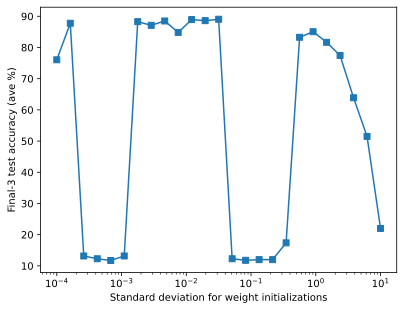

In [28]:
# Show the results!
plt.plot(stdev,accresults,'s-')
plt.xlabel('Standard deviation for weight initializations')
plt.ylabel('Final-3 test accuracy (ave %)')
plt.xscale('log')
# plt.ylim([80,100])
plt.show()
     


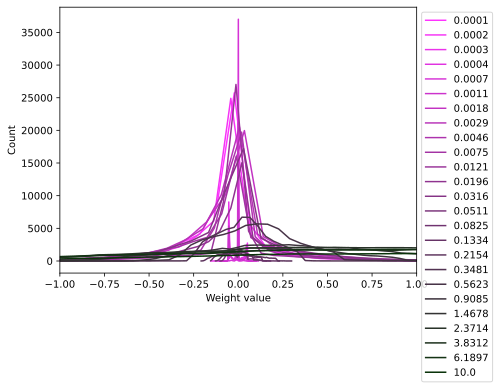

In [30]:
for i in range(len(stdev)):
  plt.plot(histodata[i,0,:],histodata[i,1,:],color=[1-i/len(stdev),.2,1-i/len(stdev)])

plt.xlabel('Weight value')
plt.ylabel('Count')
plt.legend(np.round(stdev,4),bbox_to_anchor=(1,1),loc='upper left')
plt.xlim([-1,1])
plt.show()
     
